# Simple python code for Generative Model

In [26]:
import matplotlib.pyplot as plt 
import numpy as np
from collections import Counter
import os 
import re 

#reading file 
given_Data = np.genfromtxt('probability.csv', delimiter=',',dtype=[('Char', '|S14'), ('Prob', '<f8')])

cumsum_1=np.cumsum(given_Data['Prob'])
given_Data=np.array(list(zip(given_Data['Char'],given_Data['Prob'],cumsum_1)),
                    dtype=[('Char', '<U5'),('Prob', np.float16),('Cumsum',np.float16)])
given_Data

array([('', 0.18 , 0.18 ), ('e', 0.1  , 0.28 ), ('t', 0.08 , 0.36 ),
       ('a', 0.07 , 0.43 ), ('o', 0.06 , 0.49 ), ('n', 0.06 , 0.55 ),
       ('i', 0.06 , 0.61 ), ('s', 0.05 , 0.66 ), ('r', 0.05 , 0.71 ),
       ('h', 0.04 , 0.75 ), ('l', 0.03 , 0.78 ), ('d', 0.03 , 0.81 ),
       ('u', 0.02 , 0.83 ), ('c', 0.02 , 0.85 ), ('m', 0.02 , 0.87 ),
       ('f', 0.02 , 0.89 ), ('w', 0.02 , 0.91 ), ('g', 0.02 , 0.93 ),
       ('p', 0.02 , 0.95 ), ('y', 0.01 , 0.96 ), ('b', 0.01 , 0.97 ),
       ('v', 0.01 , 0.98 ), ('k', 0.01 , 0.99 ), ('x', 0.006, 0.996),
       ('j', 0.002, 0.998), ('q', 0.001, 0.999), ('z', 0.001, 1.   )],
      dtype=[('Char', '<U5'), ('Prob', '<f2'), ('Cumsum', '<f2')])

# Create a data frame of character frequency for the given corpus. Count the characters and spaces in the stories dump.

In [30]:
#accessing files from folder and reading characters count
char=Counter()
word_Stories=Counter()
for file in os.listdir('Stories/'):
#         print(file)
        f=open('Stories/'+file,'r')
        content=f.read()
        c= content.lower()
        c= re.sub(r"[^a-z0-9 ]","",c)
        char += Counter(c)
        w = re.findall('\w+',content.lower())
        word_Stories += Counter(w)

char_Array = np.array(list(char.items()),dtype=[('Char', '<U5'), ('Freq', '<i8')])

#calculating probability 
prob=np.array(list(char_Array['Freq']/np.sum(char_Array['Freq'])))

#calculating cumsum of the probability
cumsum=np.cumsum(prob)

#creating dataframe 
char_Array=np.array(list(zip(char_Array['Char'],char_Array['Freq'],prob,cumsum)),
                    dtype=[('Char', '<U5'), ('Freq', '<i8'),('Prob', np.float16),('Cumsum',np.float16)])
char_Array

(array([('t',  6498, 7.6599e-02, 0.0766), ('h',  4976, 5.8655e-02, 0.1353),
        ('e',  8846, 1.0431e-01, 0.2396), (' ', 16016, 1.8884e-01, 0.4285),
        ('l',  2853, 3.3630e-02, 0.462 ), ('o',  4913, 5.7922e-02, 0.52  ),
        ('n',  4641, 5.4718e-02, 0.5747), ('g',  1544, 1.8204e-02, 0.593 ),
        ('j',   112, 1.3208e-03, 0.594 ), ('u',  1753, 2.0660e-02, 0.6147),
        ('w',  1773, 2.0905e-02, 0.6357), ('i',  4441, 5.2368e-02, 0.688 ),
        ('f',  1489, 1.7548e-02, 0.7056), ('a',  5633, 6.6406e-02, 0.772 ),
        ('d',  3408, 4.0192e-02, 0.8125), ('b',  1090, 1.2848e-02, 0.825 ),
        ('y',  1200, 1.4145e-02, 0.8394), ('v',   608, 7.1678e-03, 0.8467),
        ('p',  1124, 1.3252e-02, 0.86  ), ('r',  3917, 4.6173e-02, 0.906 ),
        ('k',   576, 6.7902e-03, 0.9126), ('s',  4168, 4.9133e-02, 0.962 ),
        ('m',  1551, 1.8280e-02, 0.98  ), ('c',  1534, 1.8082e-02, 0.998 ),
        ('x',    54, 6.3658e-04, 0.999 ), ('z',    34, 4.0078e-04, 0.999 ),
        ('q'

## Use the Probabilistic Generative model to generate a text of 200 words. To generate so, use the distribution of frequency from the data frame you created for Task 1

In [33]:
from random import random

def Word_generator(df,count):
    text=''
    for i in range(count):
        #generating random number 
        r= random()
        char_prob=np.min(df[df['Cumsum']>=r]['Cumsum'])
        x=df[df['Cumsum']==char_prob]['Char'][0]
        if x=='':
            text+=' '
            continue
        else:
            text+=df[df['Cumsum']==char_prob]['Char'][0]
        
    print(text)
    return text

f=open('generated_words.txt','w+')

#generating text 
text=Word_generator(char_Array,200)

#writing in the file 
f.write(text)
f.close()

odpo dhos ottnadttkiseorps fe ohot att otoidlolwm ch eptfaotesldud eaaeu ybe   httsefearhrbassted scn spoeerttoto rwchhhafteasonsrrdeekta  wuo  slslohnd td lnn hlhruaig ilekioocrehefnsnrnt   gsea   pighentti t a nttctmr eahn trkohd mnohesd iiato r k bawoi pgstt cfcnvdasrnnlgnarhlepe  iratrlyrralst  


## use the distribution of frequency from the csv file provided

In [34]:
f=open('generated_words_given.txt','w+')

#generating text 
text_given=Word_generator(given_Data,200)

#writing in the file 
f.write(text_given)
f.close()

ie  adbe  nacatr stolmkes nfrciro  enhsoe m gaaadfm aeoc   i sk oaony testannutash ngfu nmr grekyctietaetivscsi gc erthaitec alotoaswnxdddoneaa  osnaef weogveu dwhaethcrfrectstn  rnnrjng ehmipsg hetderrondoa nkhg bcw a acccvo eh aosortuahtykkenaoe tti nloititodndnnq mtpu adpbes leoeiik   eucnvme bxo


# Plot the word rank frequency diagram and CDF

Text(0.5, 1.0, 'Probability distribution of stories')

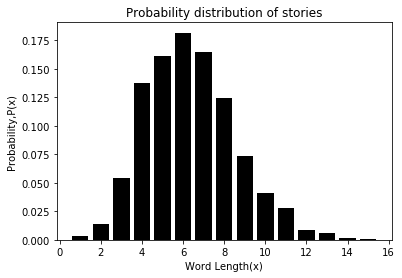

In [35]:
#Plot the probability distribution of word lengths of all 3 data sets(Stories and 2 generated text).
word_Stories
# word_Array = np.array(list(word_Stories.items()),dtype=[('Words', '<U5'), ('Freq', '<i8')])

word_Length=np.array(list(map(lambda x: len(x),word_Stories)))
word_Len_Freq=np.array(np.unique(word_Length, return_counts=True)).T
word_Len_prob=word_Len_Freq[:,1]/np.sum(word_Len_Freq[:,1])
word_Len_prob,word_Len_Freq[:,0]
#probabilty distribution of stories 
plt.bar(word_Len_Freq[:,0],word_Len_prob,color='black')
plt.xlabel("Word Length(x)")
plt.ylabel("Probability,P(x)")
plt.title("Probability distribution of stories")

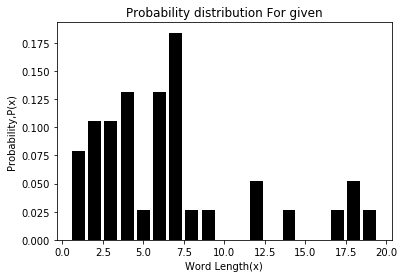

In [37]:
#for generated text from stories
def word_list(filename):
    f=open(filename,'r')
    content=f.read()
    w = re.findall('\w+',content.lower())
#     print(w)
    words = np.array(w)
    return words
def probability_distribution(words,Title):
    word_Length=np.array(list(map(lambda x: len(x),words)))
    word_Len_Freq=np.array(np.unique(word_Length, return_counts=True)).T
    word_Len_prob=word_Len_Freq[:,1]/np.sum(word_Len_Freq[:,1])
    word_Len_prob,word_Len_Freq[:,0]
#probabilty distribution of stories 
    plt.bar(word_Len_Freq[:,0],word_Len_prob,color='black')
    plt.xlabel("Word Length(x)")
    plt.ylabel("Probability,P(x)")
    plt.title("Probability distribution"+Title)
    return word_Len_prob

#probability distribution for given data
word=word_list('generated_words_given.txt')
word_Len_Given=probability_distribution(word,' For given')




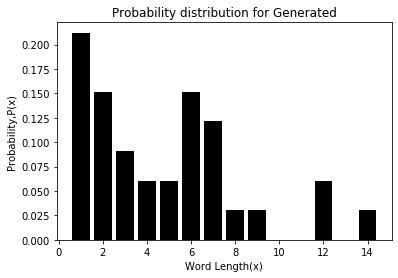

In [23]:
#probability distribution for generated from stories
word=word_list('generated_words.txt') 
word_Len_Gen=probability_distribution(word,' for Generated')

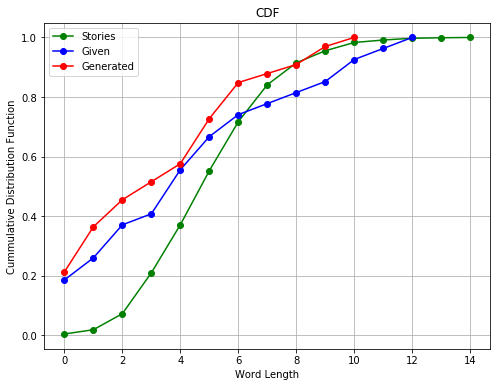

In [24]:
#CDF plot for 
cdf_stories= np.cumsum(word_Len_prob)
cdf_given= np.cumsum(word_Len_Given)
cdf_gen= np.cumsum(word_Len_Gen)
plt.figure(figsize=(8,6))
plt.plot(cdf_stories,c='green', label='Stories',marker='o')
plt.plot(cdf_given,c='blue', label='Given',marker='o')
plt.plot(cdf_gen,c='red', label='Generated',marker='o')
plt.grid()
plt.xlabel("Word Length")
plt.ylabel("Cummulative Distribution Function")
plt.title("CDF")
plt.legend()
plt.show()


In [9]:
ks=[]
for i in range(len(cdf_given)):
    ks.append(cdf_given[i]-cdf_stories[i])
print('KS test value for provided probability is :',np.max(ks))
ks=[]
for i in range(len(cdf_gen)):
    ks.append(cdf_gen[i]-cdf_stories[i])
print('KS test value for provided data is :',np.max(ks))

KS test value for provided probability is : 0.3948836696438417
KS test value for provided data is : 0.45272518534373724
